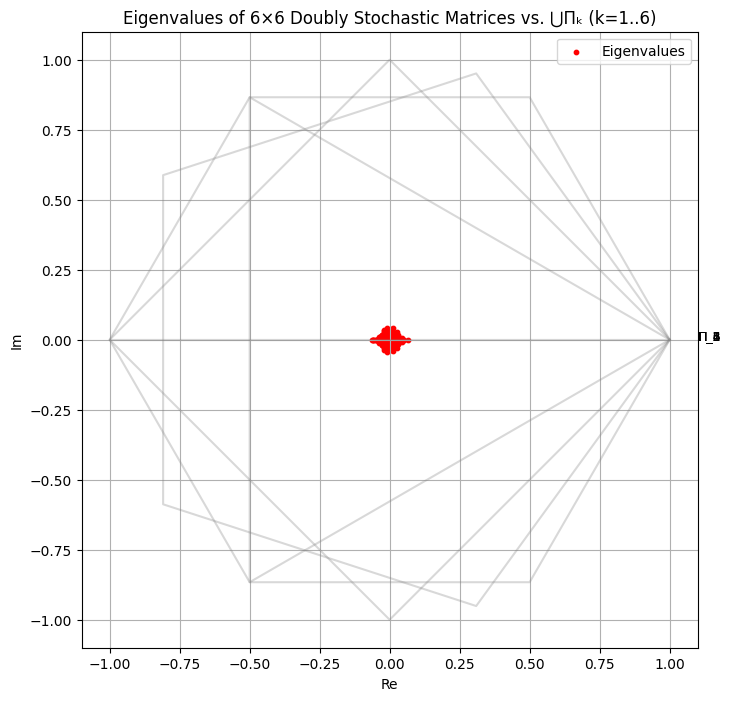

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from scipy.linalg import eig

def kth_roots_of_unity(k):
    return np.array([np.exp(2j * np.pi * i / k) for i in range(k)])

def plot_Pi_k(ax, k, color='gray', label=None):
    roots = kth_roots_of_unity(k)
    polygon = np.append(roots, roots[0])  # close the loop
    ax.plot(polygon.real, polygon.imag, color=color, alpha=0.3)
    if label:
        ax.text(polygon[0].real * 1.1, polygon[0].imag * 1.1, label, fontsize=9)

def random_doubly_stochastic(n):
    perms = [np.eye(n)[list(p)] for p in permutations(range(n))]
    weights = np.random.dirichlet(np.ones(len(perms)))
    A = sum(w * P for w, P in zip(weights, perms))
    return A

def generate_eigenvalues(n, trials=20):
    all_eigs = []
    for _ in range(trials):
        A = random_doubly_stochastic(n)
        eigvals = eig(A, left=False, right=False)
        for z in eigvals:
            if not np.isclose(z.real, 1) or not np.isclose(z.imag, 0):  # skip trivial eigenvalue
                all_eigs.append(z)
    return np.array(all_eigs)

def plot_eigenvalues_vs_Pi(n=6, trials=20):
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot Pi_k for k = 1 to n
    for k in range(1, n + 1):
        plot_Pi_k(ax, k, label=f"Π_{k}")

    # Generate eigenvalues and plot them
    eigs = generate_eigenvalues(n, trials)
    ax.scatter(eigs.real, eigs.imag, c='red', s=10, label='Eigenvalues')

    # Formatting
    ax.set_title(f"Eigenvalues of {n}×{n} Doubly Stochastic Matrices vs. ⋃Πₖ (k=1..{n})")
    ax.set_xlabel("Re")
    ax.set_ylabel("Im")
    ax.legend()
    ax.set_aspect('equal')
    ax.grid(True)
    plt.show()

# Run the visualization
plot_eigenvalues_vs_Pi(n=6, trials=50)
